# 2.2.1 Definición de probabilidad y sus aplicaciones: Algoritmo 1R

In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

Las técnicas de clasificación son utilizadas para resolver problemas en los cuales se debe determinar a cuál clase pertenece una instancia a partir de los valores de sus atributos; entre los casos prácticos de aplicación se encuentran: el diagnóstico de enfermedades (el paciente tiene o no la enfermedad), la detección de fraudes, los sistemas de reconocimiento (el objeto es o no es una persona), el riesgo crediticio (el solicitante pagará o no pagará la deuda). En este tutorial se presenta el algoritmo 1R, el cual permite construir un clasificador de referencia basado en reglas de asociación, y contra el cual se pueden contrastar los resultados de otros algoritmos más complejos.

## 1.2.1.1 Función de Rosenbrock

$$ f(x,y) = 100 * (x^2 − y)^2 + (1 − x)^2 $$
$$ x \varepsilon [−2.048,2.048]  $$
$$ y \varepsilon [-1,4]  $$
$$ f(1,1) = 0 $$

In [28]:
def f(x, y):
    return 100 * (x ** 2 - y) ** 2 + (1 - x) ** 2

In [29]:
import numpy as np

#
# Generación de un vector de 10 puntos para x
#
X = np.linspace(start=-2.048, stop=2.048, num=10)
X

array([-2.048     , -1.59288889, -1.13777778, -0.68266667, -0.22755556,
        0.22755556,  0.68266667,  1.13777778,  1.59288889,  2.048     ])

In [30]:
#
# Generación de un vector de 10 puntos para y
#
Y = np.linspace(start=-0.1, stop=4.0, num=10)
Y

array([-0.1       ,  0.35555556,  0.81111111,  1.26666667,  1.72222222,
        2.17777778,  2.63333333,  3.08888889,  3.54444444,  4.        ])

In [31]:
#
# Generación de una matriz para representar
# una malla de puntos
#
X, Y = np.meshgrid(X, Y)
display(X, Y)

array([[-2.048     , -1.59288889, -1.13777778, -0.68266667, -0.22755556,
         0.22755556,  0.68266667,  1.13777778,  1.59288889,  2.048     ],
       [-2.048     , -1.59288889, -1.13777778, -0.68266667, -0.22755556,
         0.22755556,  0.68266667,  1.13777778,  1.59288889,  2.048     ],
       [-2.048     , -1.59288889, -1.13777778, -0.68266667, -0.22755556,
         0.22755556,  0.68266667,  1.13777778,  1.59288889,  2.048     ],
       [-2.048     , -1.59288889, -1.13777778, -0.68266667, -0.22755556,
         0.22755556,  0.68266667,  1.13777778,  1.59288889,  2.048     ],
       [-2.048     , -1.59288889, -1.13777778, -0.68266667, -0.22755556,
         0.22755556,  0.68266667,  1.13777778,  1.59288889,  2.048     ],
       [-2.048     , -1.59288889, -1.13777778, -0.68266667, -0.22755556,
         0.22755556,  0.68266667,  1.13777778,  1.59288889,  2.048     ],
       [-2.048     , -1.59288889, -1.13777778, -0.68266667, -0.22755556,
         0.22755556,  0.68266667,  1.13777778

array([[-0.1       , -0.1       , -0.1       , -0.1       , -0.1       ,
        -0.1       , -0.1       , -0.1       , -0.1       , -0.1       ],
       [ 0.35555556,  0.35555556,  0.35555556,  0.35555556,  0.35555556,
         0.35555556,  0.35555556,  0.35555556,  0.35555556,  0.35555556],
       [ 0.81111111,  0.81111111,  0.81111111,  0.81111111,  0.81111111,
         0.81111111,  0.81111111,  0.81111111,  0.81111111,  0.81111111],
       [ 1.26666667,  1.26666667,  1.26666667,  1.26666667,  1.26666667,
         1.26666667,  1.26666667,  1.26666667,  1.26666667,  1.26666667],
       [ 1.72222222,  1.72222222,  1.72222222,  1.72222222,  1.72222222,
         1.72222222,  1.72222222,  1.72222222,  1.72222222,  1.72222222],
       [ 2.17777778,  2.17777778,  2.17777778,  2.17777778,  2.17777778,
         2.17777778,  2.17777778,  2.17777778,  2.17777778,  2.17777778],
       [ 2.63333333,  2.63333333,  2.63333333,  2.63333333,  2.63333333,
         2.63333333,  2.63333333,  2.63333333

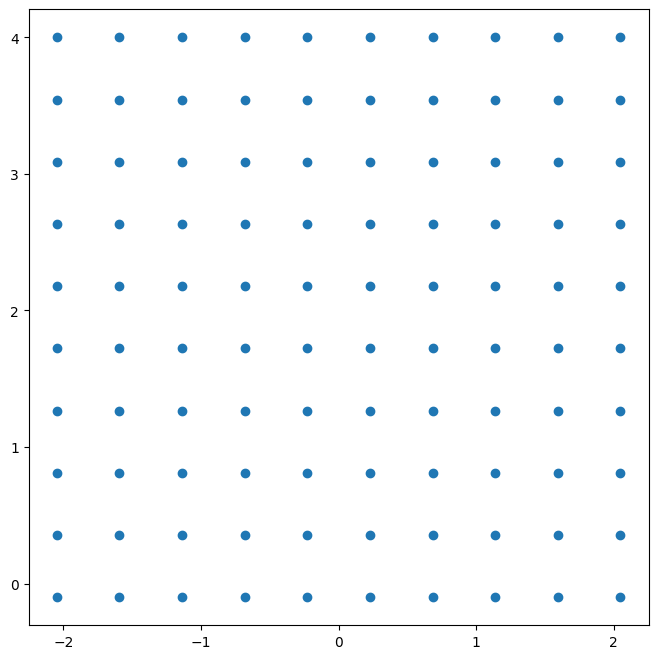

In [32]:
plt.figure(figsize=(8, 8))
plt.scatter(X, Y)
plt.show()

### Evaluación de la función (x, y)

In [33]:
#
# Generación de una matriz con los valores de f(x, y)
#
Z = f(X, Y)
Z

array([[1.85339499e+03, 7.02255571e+02, 1.99043793e+02, 3.48707909e+01,
        3.81065595e+00, 2.90043373e+00, 3.21401242e+01, 1.94492682e+02,
        6.95884015e+02, 1.84520299e+03],
       [1.48288927e+03, 4.82721779e+02, 9.27389479e+01, 4.05191087e+00,
        1.07347584e+01, 9.82453623e+00, 1.32124420e+00, 8.81878368e+01,
        4.76350223e+02, 1.47469727e+03],
       [1.15388972e+03, 3.04694159e+02, 2.79402758e+01, 1.47392037e+01,
        5.91650338e+01, 5.82548116e+01, 1.20085370e+01, 2.33891647e+01,
        2.98322603e+02, 1.14569772e+03],
       [8.66396340e+02, 1.68172712e+02, 4.64777646e+00, 6.69326694e+01,
        1.49101482e+02, 1.48191260e+02, 6.42020027e+01, 9.66653522e-02,
        1.61801157e+02, 8.58204340e+02],
       [6.20409136e+02, 7.31574381e+01, 2.28614500e+01, 1.60632308e+02,
        2.80544103e+02, 2.79633881e+02, 1.57901641e+02, 1.83103389e+01,
        6.67858826e+01, 6.12217136e+02],
       [4.15928104e+02, 1.96483370e+01, 8.25812964e+01, 2.95838119e+02,
   

### Projection 3d

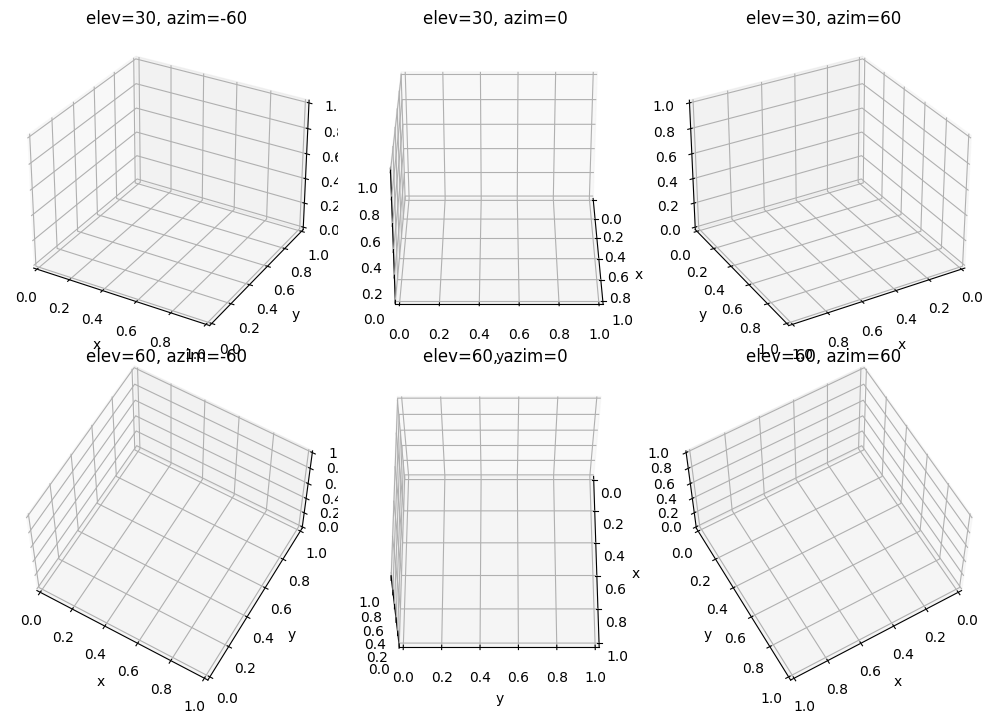

In [34]:
fig = plt.figure(figsize=(10, 7))

i = 1
for elev in [30, 60]:
    for azim in [-60, 0, 60]:

        ax = fig.add_subplot(2, 3, i, projection="3d", azim=azim, elev=elev)
        i += 1
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title("elev={}, azim={}".format(elev, azim))

plt.tight_layout()
plt.show()

### plot_surface()

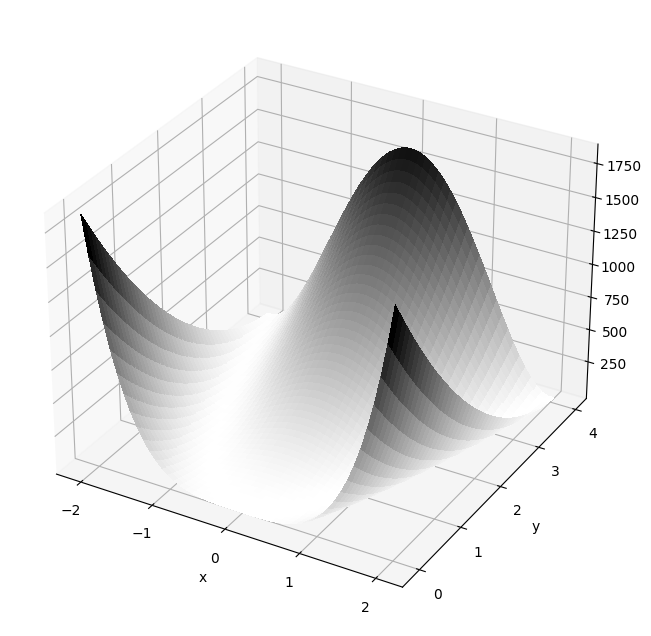

In [35]:
#
# Gráfica de la función
#
from matplotlib import cm

X = np.linspace(start=-2.048, stop=2.048, num=50)
Y = np.linspace(start=-0.1, stop=4.0, num=50)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(
    X,
    Y,
    Z,
    cmap=cm.binary,
    linewidth=1,
    antialiased=False,
)

plt.xlabel("x")
plt.ylabel("y")
plt.show()

### plot_wireframe()

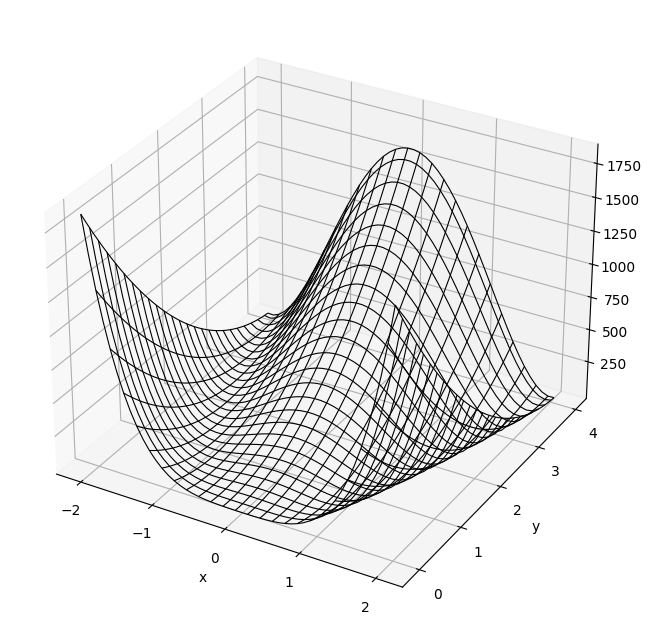

In [36]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection = '3d')

ax.plot_wireframe(
    X,
    Y,
    Z,
    color="black",
    linewidth=0.8,
    alpha=1.0,
    rstride=2,
    cstride=2,
)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Combinación de plot_wireframe() y plot.suface() para mejorar la visualización

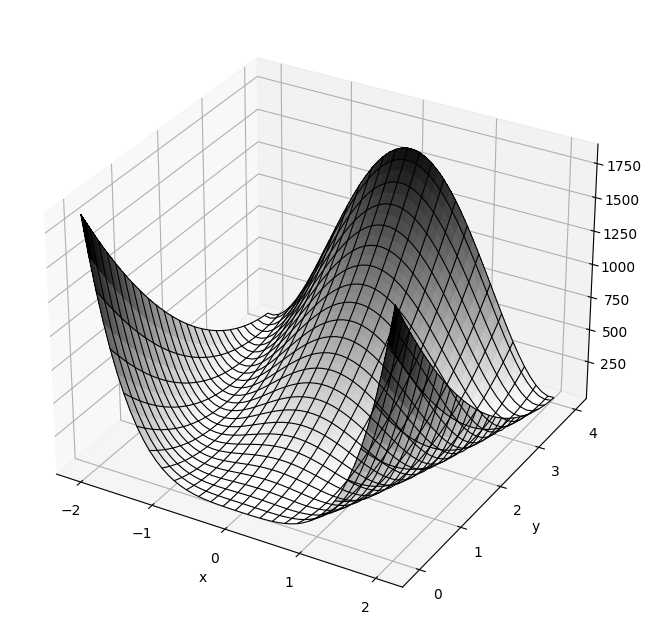

In [37]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection = '3d')

ax.plot_surface(
    X,
    Y,
    Z,
    cmap=cm.binary,
    linewidth=1,
    antialiased=False,
)

ax.plot_wireframe(
    X,
    Y,
    Z,
    color="black",
    linewidth=0.8,
    alpha=1.0,
    rstride=2,
    cstride=2,
)

plt.xlabel("x")
plt.ylabel("y")
plt.show()

### plt.contour()

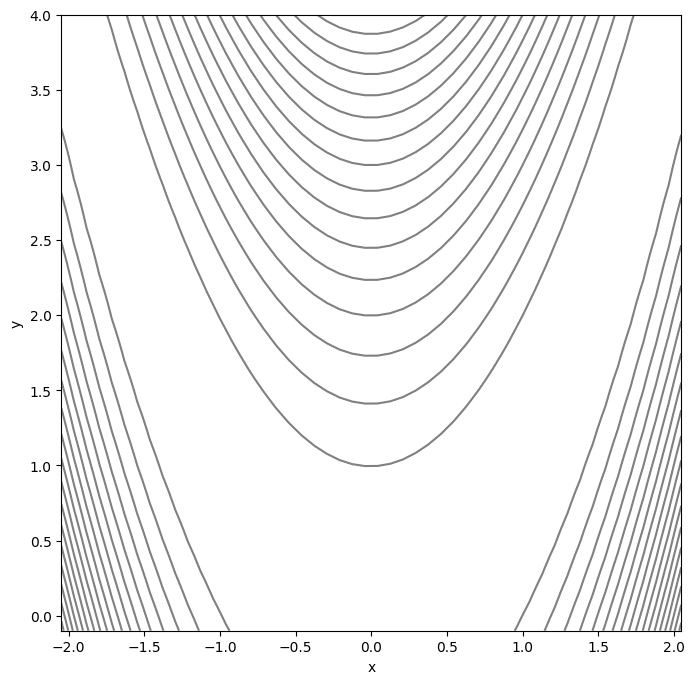

In [38]:
#
# Líneas de nivel con el mismo color
#
fig = plt.figure(figsize=(8, 8))

plt.gca().contour(
    X,
    Y,
    Z,
    colors="gray",
    levels=20,
)

plt.xlabel("x")
plt.ylabel("y")
plt.show()

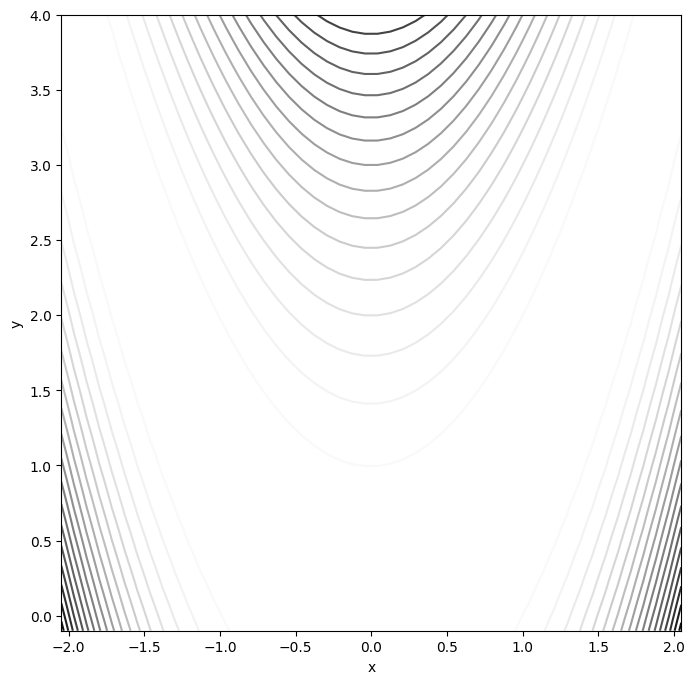

In [39]:
#
# Líneas de nivel con diferentes colores
#
fig = plt.figure(figsize=(8, 8))
plt.gca().contour(
    X,
    Y,
    Z,
    cmap=cm.Greys,
    levels=20,
)

plt.xlabel("x")
plt.ylabel("y")
plt.show()

### plt.contourf()

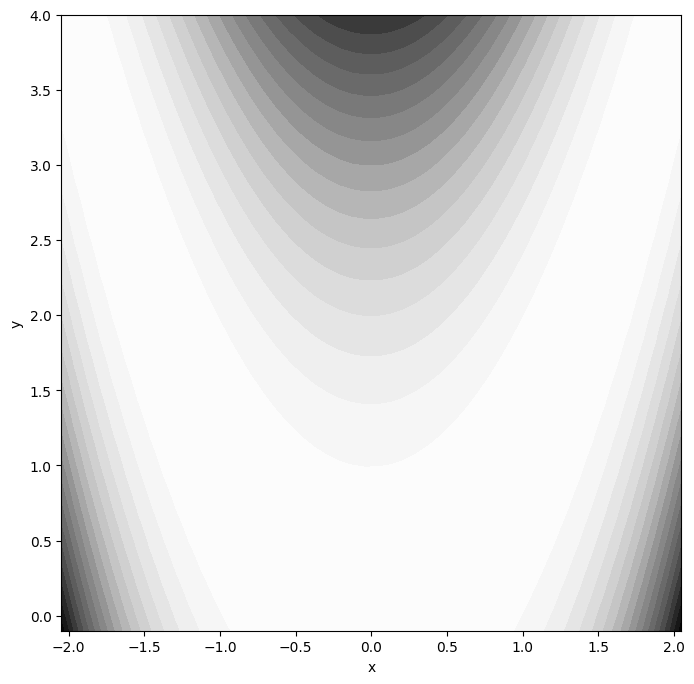

In [40]:
fig = plt.figure(figsize=(8, 8))

plt.gca().contourf(
    X,
    Y,
    Z,
    cmap=cm.Greys,
    levels=20,
)

plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Uso de contour() y contourf() para mejorar la visualización

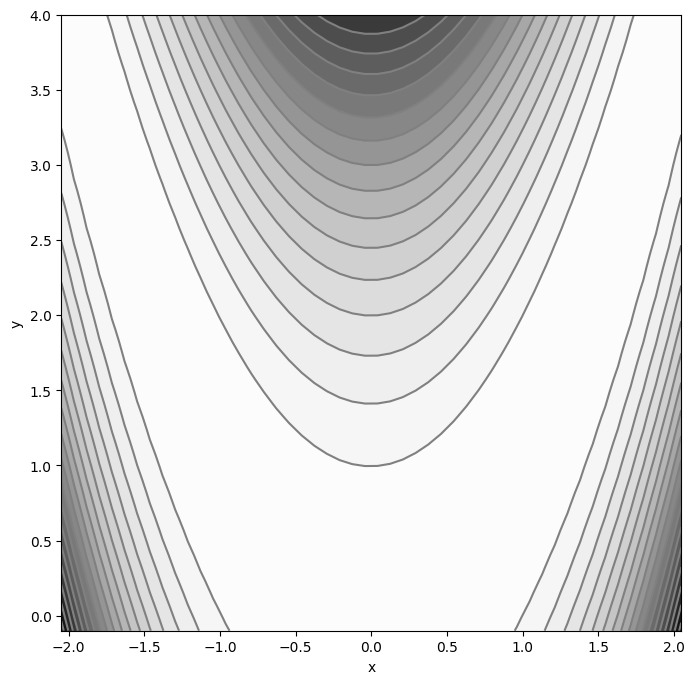

In [41]:
fig = plt.figure(figsize=(8, 8))

plt.gca().contourf(
    X,
    Y,
    Z,
    cmap=cm.Greys,
    levels=20,
    alpha=1.0,
)

plt.gca().contour(
    X,
    Y,
    Z,
    colors="gray",
    levels=20,
)


plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Punto de mínima de la función

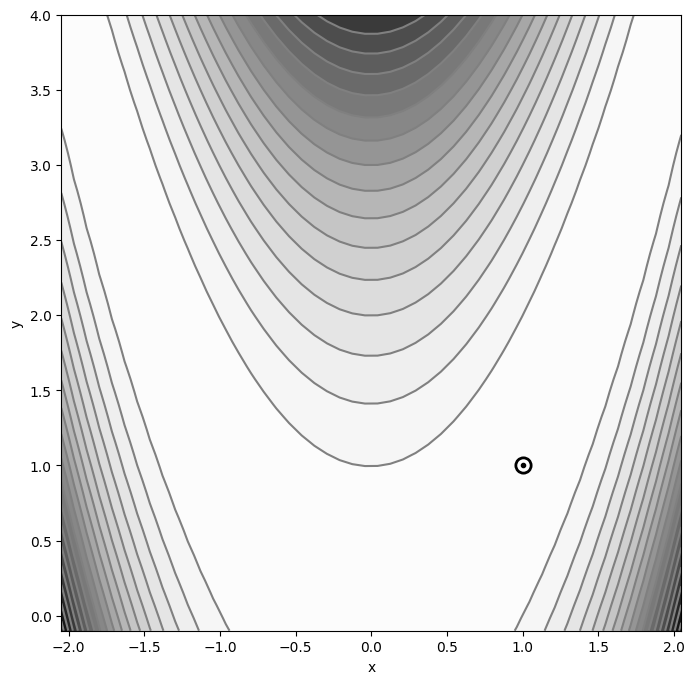

In [42]:
fig = plt.figure(figsize=(8, 8))

plt.gca().contourf(
    X,
    Y,
    Z,
    cmap=cm.Greys,
    levels=20,
    alpha=1.0,
)

plt.gca().contour(
    X,
    Y,
    Z,
    colors="gray",
    levels=20,
)

plt.plot(
    [1],
    [1],
    "o",
    color="black",
    fillstyle="none",
    markersize=11,
    markeredgewidth=2,
)

plt.plot(
    [1],
    [1],
    ".",
    color="black",
)

plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [43]:
print('ok_')

ok_
